## 1. Read the census data using pandas library

In [44]:
import pandas as pd

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
census = pd.read_csv('/content/drive/MyDrive/GITHUB/Income Prediction Using TensorFlow/Data/census_data.csv')

## 2. Display the head of the dataset

In [47]:
census.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [48]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education_num   32561 non-null  int64 
 4   marital_status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   gender          32561 non-null  object
 9   capital_gain    32561 non-null  int64 
 10  capital_loss    32561 non-null  int64 
 11  hours_per_week  32561 non-null  int64 
 12  native_country  32561 non-null  object
 13  income_bracket  32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


## 3. Convert the label column to 0s and 1s instead of strings

In [49]:
census['income_bracket'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [50]:
def lable_fix(label):
    if label == ' <=50K':
        return 0
    else:
        return 1

In [51]:
census['income_bracket'] = census['income_bracket'].apply(lable_fix)

In [52]:
import pylab

<ipython-input-53-e9260777d8bc>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
<ipython-input-53-e9260777d8bc>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
<ipython-input-53-e9260777d8bc>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
<ipython-input-53-e9260777d8bc>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


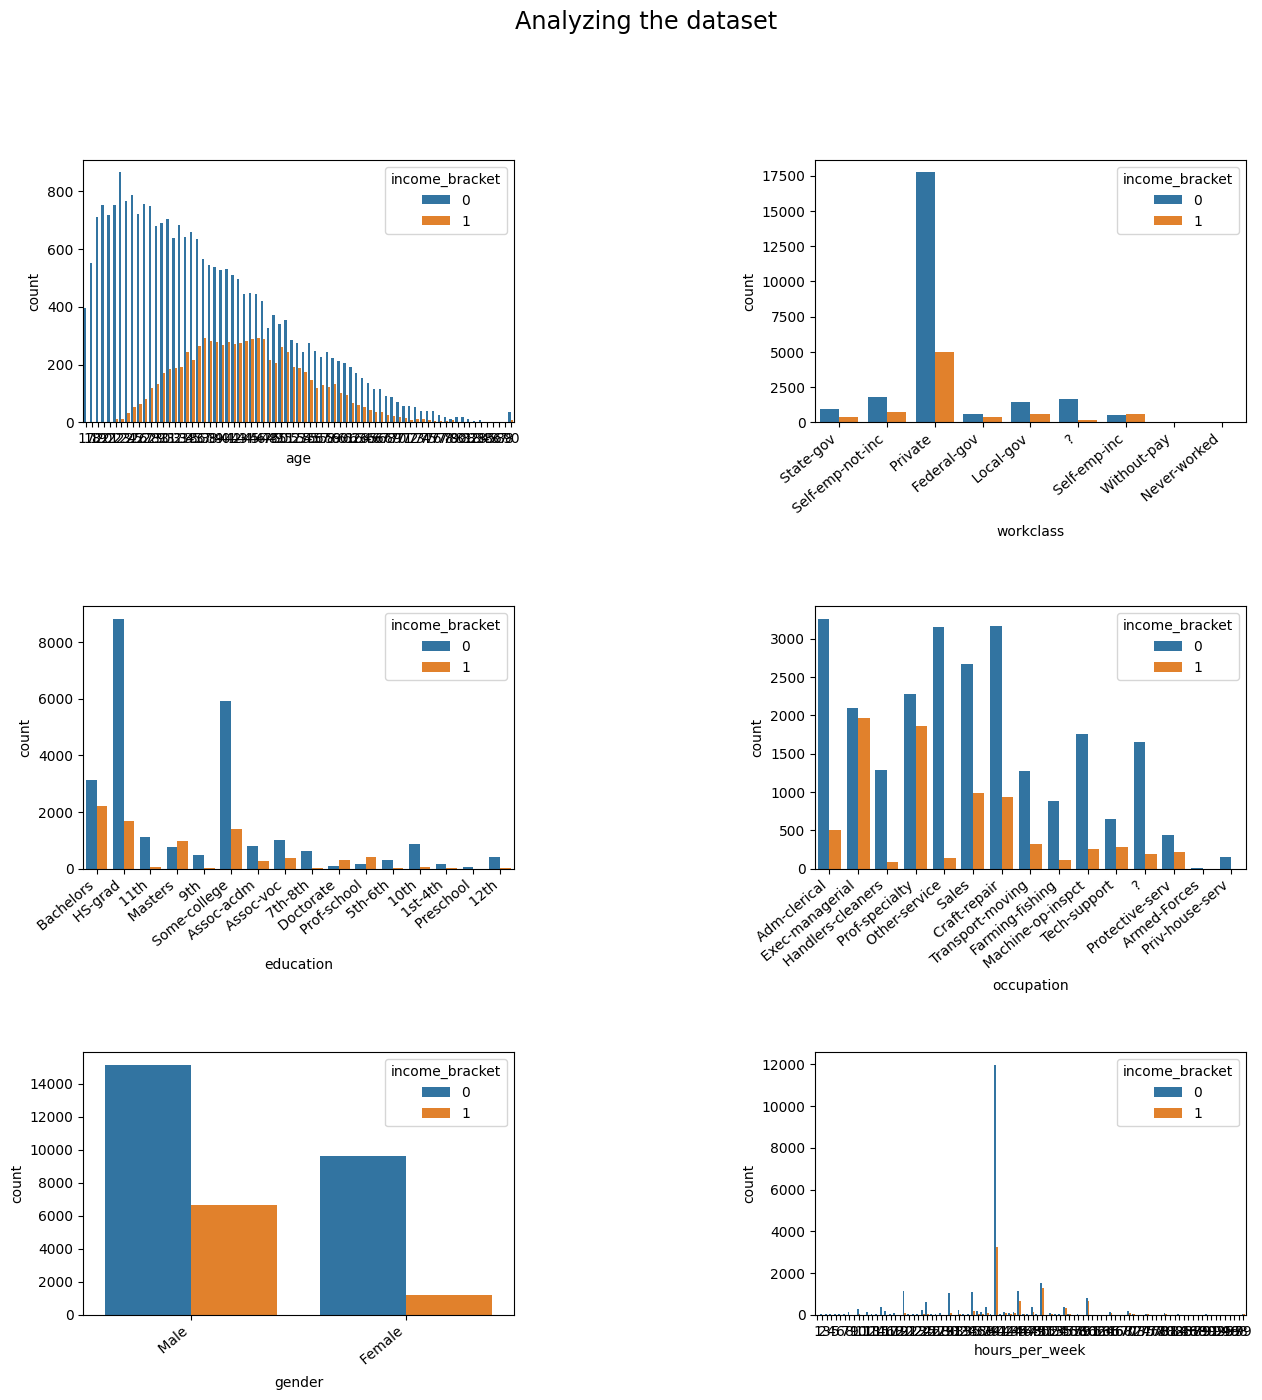

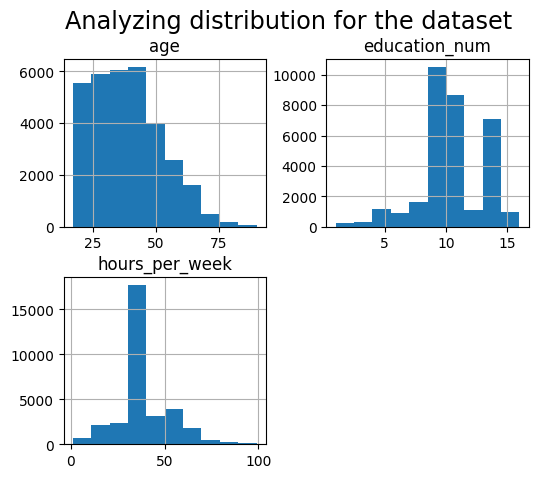

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming dataset is already loaded
# Replace dataset with the actual DataFrame variable

def Plot():
    # Find indices where income_bracket is 1 (>50K) and 0 (<=50K)
    fig = plt.figure(figsize=(15,15))
    fig.subplots_adjust(hspace=0.7, wspace=0.7)
    plt.suptitle("Analyzing the dataset", fontsize="xx-large")

    # Age vs Income Bracket
    plt.subplot(3,2,1)
    ax = sns.countplot(x='age', hue='income_bracket', data=census)

    # Workclass vs Income Bracket
    plt.subplot(3,2,2)
    ax = sns.countplot(x='workclass', hue='income_bracket', data=census)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

    # Education vs Income Bracket
    plt.subplot(3,2,3)
    ax = sns.countplot(x='education', hue='income_bracket', data=census)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

    # Occupation vs Income Bracket
    plt.subplot(3,2,4)
    ax = sns.countplot(x='occupation', hue='income_bracket', data=census)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

    # Gender vs Income Bracket
    plt.subplot(3,2,5)
    ax = sns.countplot(x='gender', hue='income_bracket', data=census)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

    # Hours per week vs Income Bracket
    plt.subplot(3,2,6)
    ax = sns.countplot(x='hours_per_week', hue='income_bracket', data=census)

    plt.show()

# Call the function to create the visualizations
Plot()

# Analyzing distribution for specific columns
census.hist(
    column=["age", "education_num", "hours_per_week"], figsize=(6, 5))
plt.suptitle("Analyzing distribution for the dataset", fontsize="xx-large")
plt.show()

## 4. Perform the train test split on the data

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_data = census.drop('income_bracket' , axis = 1)
y_lables = census['income_bracket']
x_train, x_test, y_train, y_test = train_test_split(x_data, y_lables, test_size=0.3, random_state=101)

In [56]:
census.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income_bracket'],
      dtype='object')

## 5. Create feature columns for categorical values using vocabulary lists or hash buckets

In [ ]:
import tensorflow as tf

In [ ]:
gender = tf.feature_column.categorical_column_with_vocabulary_list("gender" , ["Female", "Male"])
occupation = tf.feature_column.categorical_column_with_hash_bucket("occupation" , hash_bucket_size=1000)
marital_status = tf.feature_column.categorical_column_with_hash_bucket("marital_status" , hash_bucket_size=1000)
relationship = tf.feature_column.categorical_column_with_hash_bucket("relationship", hash_bucket_size=1000)
education = tf.feature_column.categorical_column_with_hash_bucket("education" ,hash_bucket_size=1000)
workclass = tf.feature_column.categorical_column_with_hash_bucket("workclass", hash_bucket_size=1000)
native_country = tf.feature_column.categorical_column_with_hash_bucket("native_country", hash_bucket_size=1000)

## 6. Create the feature columns for the continuous values using numeric_column

In [ ]:
age = tf.feature_column.numeric_column("age")
education_num = tf.feature_column.numeric_column("education_num")
capital_gain = tf.feature_column.numeric_column("capital_gain")
capital_loss = tf.feature_column.numeric_column("capital_loss")
hours_per_week = tf.feature_column.numeric_column("hours_per_week")

## 7. Put all these variables into a single list with variable name feat_cols

In [ ]:
feat_cols = [gender, occupation, marital_status, relationship, education, workclass, native_country, age, education_num,
             capital_gain, capital_loss, hours_per_week]

## 8. Create the input function with batch size and epochs

In [ ]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train, y=y_train, batch_size=100, num_epochs=None, shuffle=True)

## 9. Create the model with tf.estimator using Linear Classifier

In [ ]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\malic\\AppData\\Local\\Temp\\tmprfey3xgg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002174AE95C88>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## 10. Train the model for atleast 5000 steps

In [ ]:
model.train(input_fn=input_func, steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\malic\AppData\Local\Temp\tmprfey3xgg\model.ckpt.
INFO:tensorflow:loss = 69.31472, step = 1
INFO:tensorflow:global_step/sec: 76.409
INFO:tensorflow:loss = 358.03915, step = 101 (1.314 sec)
INFO:tensorflow:global_step/sec: 168.235
INFO:tensorflow:loss = 343.34198, step = 201 (0.593 sec)
INFO:tensorflow:global_step/sec: 176.585
INFO:tensorflow:loss = 727.407, step = 301 (0.568 sec)
INFO:tensorflow:global_step/sec: 173.558
INFO:tensorflow:loss = 754.88605, step = 401 (0.575 sec)
INFO:tensorflow:global_step/sec: 175.793
INFO:tensorflow:loss = 983.00995, step = 501 (0.570 sec)
INFO:tensorflow:global_step/sec: 176.785
INFO:tensorflow:loss = 175.8079, step = 601 (0.564 sec)
INFO:tensorflow:global_step/sec: 

## 11. Evalution of the model

In [ ]:
pred_fn = tf.estimator.inputs.pandas_input_fn(x=x_test, batch_size=len(x_train), shuffle=False)

In [ ]:
# Using model.predict() and passing the input function.
# This will produce a generator of predictions, which can then transformed into list
predictions = list(model.predict(input_fn=pred_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\malic\AppData\Local\Temp\tmprfey3xgg\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [ ]:
# Each item in the list will look like this
predictions[0]

{'logits': array([-0.75077933], dtype=float32),
 'logistic': array([0.32065153], dtype=float32),
 'probabilities': array([0.67934847, 0.3206515 ], dtype=float32),
 'class_ids': array([0], dtype=int64),
 'classes': array([b'0'], dtype=object)}

## 12. Create a list of class_ids key values from the prediction list of dictionaries. These prediction will be used to compare against y_test values

In [ ]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['class_ids'][0])

In [ ]:
final_preds[:10]

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

## 13. Calculating the model performance on Test Data

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, final_preds))

             precision    recall  f1-score   support

          0       0.90      0.90      0.90      7436
          1       0.69      0.69      0.69      2333

avg / total       0.85      0.85      0.85      9769

